In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
from numpy import median

import bokeh
from bokeh.plotting import figure, output_file, show, curdoc
from bokeh.layouts import gridplot
from bokeh.models import Label, Title, NumeralTickFormatter

# ignore warnings 
import warnings
warnings.filterwarnings('ignore')

## Data Visualization
In tackling the questions in not only getting the data to a place to present it in a visualization but also then know who my target audience is.  Getting the data to where it needs to be to present will be a bit of a challenge, but the harder part is which is best plot for my target audience.  My initial thoughts are younger people want more interactive plots with lots of information, vibrant colors, and interactive.  The older audience would want softer colors, most of the information summarized and easy to see, fonts must be larger and some interaction.  I am remembering in class you once said blue is not good for older people and I am thinking of using softer colors.  Going over my notes does not seem to have any specific rules and google searches are not helping either.  I am going to think of presenting this to my parents, older generation +60, and my kids the 17 to 35.

In [2]:
df = pd.read_csv('Data/consolidated_coin_data.csv')

In [3]:
df

Currency       Date  Open  High   Low Close      Volume   Market Cap
0           tezos   4-Dec-19  1.29  1.32  1.25  1.25  46,048,752  824,588,509
1           tezos   3-Dec-19  1.24  1.32  1.21  1.29  41,462,224  853,213,342
2           tezos   2-Dec-19  1.25  1.26   1.2  1.24  27,574,097  817,872,179
3           tezos   1-Dec-19  1.33  1.34  1.25  1.25  24,127,567  828,296,390
4           tezos  30-Nov-19  1.31  1.37  1.31  1.33  28,706,667  879,181,680
...           ...        ...   ...   ...   ...   ...         ...          ...
28939  bitcoin-sv   2-May-13  3.78  4.04  3.01  3.37           0   58,287,979
28940  bitcoin-sv   1-May-13  4.29  4.36  3.52   3.8           0   65,604,596
28941  bitcoin-sv  30-Apr-13   4.4  4.57  4.17   4.3           0   74,020,918
28942  bitcoin-sv  29-Apr-13  4.37  4.57  4.23  4.38           0   75,388,964
28943  bitcoin-sv  28-Apr-13   4.3   4.4  4.18  4.35           0   74,636,938

[28944 rows x 8 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28944 entries, 0 to 28943
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Currency    28944 non-null  object
 1   Date        28944 non-null  object
 2   Open        28944 non-null  object
 3   High        28944 non-null  object
 4   Low         28944 non-null  object
 5   Close       28944 non-null  object
 6   Volume      28944 non-null  object
 7   Market Cap  28944 non-null  object
dtypes: object(8)
memory usage: 1.8+ MB


In [5]:
df.describe()

Currency       Date   Open   High    Low  Close Volume Market Cap
count     28944      28944  28944  28944  28944  28944  28944      28944
unique       12       2412  12307  12057  12803  12294  16349      16058
top      tether  26-Feb-15      1      1      1      1      0    451,600
freq       2412         14   1725   1511   1367   1729   2916        394

## Clean the Data
In cleaning the data need to convert dates to datetime I used pd.to_datetime to convert the date column into dates that the pandas could use.  Secondly drop columns and I used the drop command to remove the columns that are not needed.  Also need to change column data types to floats and by using the astype command but there were commas in the object and had to remove those by using string replace.  Finally, dropping any NaN's by using the dropna command.

In [6]:
df["Date"]= pd.to_datetime(df["Date"])
df.drop(columns = ['Open','Low','Close','Market Cap'], inplace = True)
df.High = df.High.str.replace(',', '').astype(float)
df.Volume = df.Volume.str.replace(',', '').astype(float)
df = df.dropna()

# Verify Data
Above I modified the data frame and now I need to verify that the datatypes are all correct and I used the info command to see the data types.  There were no NaN in the data as the rows are the same as above.  

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28944 entries, 0 to 28943
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Currency  28944 non-null  object        
 1   Date      28944 non-null  datetime64[ns]
 2   High      28944 non-null  float64       
 3   Volume    28944 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 1.1+ MB


In [8]:
df.describe()

High        Volume
count  28944.000000  2.894400e+04
mean     309.832983  8.133058e+08
std     1416.598573  3.059516e+09
min        0.001509  0.000000e+00
25%        0.212444  2.418700e+05
50%        3.090000  5.212684e+06
75%       25.530000  1.554764e+08
max    20089.000000  5.350913e+10

## Get Unique Crypto Currency and Sort
First, I need to get each individual or unique crypto currency and I used the unique command to get the unique names and put that in variable currencies.  Once I have the unique currencies then sort the currencies alphabetically, numpy sort command sorted my values. Finally print to verify that I have the data I want and that it is alphabetized.

In [9]:
currencies = df.Currency.unique()
currencies = np.sort(currencies)
currencies

array(['binance-coin', 'bitcoin', 'bitcoin-cash', 'bitcoin-sv', 'cardano',
       'eos', 'ethereum', 'litecoin', 'stellar', 'tether', 'tezos', 'xrp'],
      dtype=object)

## Get Unique Dates and Sort
Make a variable called dates to store unique dates from the dataset.  I used the unique command again to get the unique dates and again they need to be sorted.  The dates were sorted using the numpy sort command and print to verify.  All looks correct.  I am going to use this variable in the two new data frames I am going to use to collect the high and volume data.

In [10]:
dates = df.Date.unique()
dates = np.sort(dates)
dates

array(['2013-04-28T00:00:00.000000000', '2013-04-29T00:00:00.000000000',
       '2013-04-30T00:00:00.000000000', ...,
       '2019-12-02T00:00:00.000000000', '2019-12-03T00:00:00.000000000',
       '2019-12-04T00:00:00.000000000'], dtype='datetime64[ns]')

## Create data frames for data needed
The data I am going to need is high and volume.  I have created two new data frames called high and vol using the pandas command DataFrame.  Once I have these two data frames I will add the data I need to them and use the dates variable as the index. 

In [11]:
high = pd.DataFrame()
vol = pd.DataFrame()

## Get the data needed and add to data frame
In the end I decided to get the data I needed in a loop and append it into the data frames above.  I spent a good few hours on melt and transpose, but I was not getting anywhere.  The 7 lines of code below made more sense to me. First what I need to do is loop through each currency using a for loop.  I used x as variable to store the data I need. First is filter out the currency from the dataset by using the equal.  Once I have stored that currency is sort the date using the sort_values command, I did this just to make sure it is in chronological order.  In the past I have not done this, and I have found issues later down the road.  After sorting the date, the next step is resetting the index by using the reset_index command.  When merging pandas data frames you have to clear the index if not you will get NaN values.  Next, I will add a new column into the newly created data frames high and vol of the current currency and save the High's to high and Volume to vol.  Then I clear the x variable just in case by using the empty square brackets, again I have had issues in the past and this is good practice. Finally, I add an index to the data frames which is the dates.  Since I sorted the rows by chronological order the dates and data should all match correctly.

In [12]:
for currency in currencies:
    x = df[df['Currency'] == currency]
    x = x.sort_values(by = ['Date'])
    x = x.reset_index()

    high[currency] = x.High
    vol[currency] = x.Volume
    x = []
    
high.index = dates
vol.index = dates

## Verify Data Frames
Now I want to see that my data frames are the way I intended and will do this by using the head command.  This will show me the top 5 rows of the data frame.  I will do this for both high and vol.  All looks correct now onto the questions.

In [13]:
high.head()

binance-coin  bitcoin  bitcoin-cash  bitcoin-sv  cardano   eos  \
2013-04-28          4.40   135.98        135.98        4.40     4.40  4.40   
2013-04-29          4.57   147.49        147.49        4.57     4.57  4.57   
2013-04-30          4.57   146.93        146.93        4.57     4.57  4.57   
2013-05-01          4.36   139.89        139.89        4.36     4.36  4.36   
2013-05-02          4.04   125.60        125.60        4.04     4.04  4.04   

            ethereum  litecoin  stellar  tether  tezos     xrp  
2013-04-28    135.98      4.40     4.40  135.98   4.40  135.98  
2013-04-29    147.49      4.57     4.57  147.49   4.57  147.49  
2013-04-30    146.93      4.57     4.57  146.93   4.57  146.93  
2013-05-01    139.89      4.36     4.36  139.89   4.36  139.89  
2013-05-02    125.60      4.04     4.04  125.60   4.04  125.60

In [14]:
vol.head()

binance-coin  bitcoin  bitcoin-cash  bitcoin-sv  cardano  eos  \
2013-04-28           0.0      0.0           0.0         0.0      0.0  0.0   
2013-04-29           0.0      0.0           0.0         0.0      0.0  0.0   
2013-04-30           0.0      0.0           0.0         0.0      0.0  0.0   
2013-05-01           0.0      0.0           0.0         0.0      0.0  0.0   
2013-05-02           0.0      0.0           0.0         0.0      0.0  0.0   

            ethereum  litecoin  stellar  tether  tezos  xrp  
2013-04-28       0.0       0.0      0.0     0.0    0.0  0.0  
2013-04-29       0.0       0.0      0.0     0.0    0.0  0.0  
2013-04-30       0.0       0.0      0.0     0.0    0.0  0.0  
2013-05-01       0.0       0.0      0.0     0.0    0.0  0.0  
2013-05-02       0.0       0.0      0.0     0.0    0.0  0.0

# Question 2

## Get top 5 Crypto Currencies based on Highs
Once I have got the data formatted correctly and in the data frame this now allows me to explore the dataset.  In the first line chart I can see that bit coin has the highest price compared to the rest, it is a big difference.  See fig. 1.  I then decided to normalize the highs based on returns and even though bitcoin was the highest price bitcoin cash is the highest growth.  I viewed this on a simple line graph.  See fig. 2 (Hilpisch, 2019, pg. 410).  Now onto the task at hand which is getting the top 5 Crypto Currencies based on high price.  The way I got this was using the max function and sorting them descending.  Then assigning the head to a variable with the top 5 names.  Finally selecting the columns, I needed with the top 5 names.  Now to explore this data a bit more.  I did this by looking first at correlations of the dataset and then the distributions of the returns.  See Fig. 3 and 4 (Hilpisch, 2019, pg. 224).    Next is viewing the top 5 in a simple line chart and see how they compare. See Fig. 5 and 6.   Then see how the dataset looks on a return basis.  See Fig. 7 (Hilpisch, 2019, pg. 410).  There is quite a degree of difference.  Now off to look at other plots to see the dataset.  See Fig. 8, 9, 10 and 11.  On Fig. 10 the swarmplot took a while but it did not really give me any real insight.  The first plot Fig. 12 I want to show the 17-to-35-year old’s is something interactive but shows the volatility of the highs.  I was not able to get the altviz to work, I went back to lots of the notes in class and previous CA’s I have turned in.  This led me to a plotly graph that I used before but only had the slider.  This for me was not interactive enough.  I know that I want a line chart and the only library as mentioned before is ploty but there is also plotly objects such as go.  I created two variables crypto and dates to get from the Top5 data frame.  This is to select each individual currency and plot them on the one graph.  Using the figure command from go I added the layout by using another go command layout.  Updatemenus command to put the dictionary and button as type at the top right of the plot.  Using xaxis and yaxis commands to put in the title using the dictionary again and text_title to assign the names. Now to add each crypto currency by using the add_trace command and making it a line chart with the go.Line.  The X on the plot will be the dates and the y will be the prices of the currency.  The visible command was in the example and I left it as is.  Next is to add the buttons and I found this on Stack Overflow and Seaborn (Stack Overflow, n.d.), (Seaborn Examples, n.d.), (plotly.com, n.d.).  Update the figure layout by adding buttons using the updatemenus command.  Each variable is a dictionary, and the label is the individual currency and update the method when button click the args then show which variable to show and which not to show did this for each currency. Finally, I put in the range slider using the update_xaxes and rangeslider_visible commands.  Going with the initial setup of the 1 month, 6-month, year to date, 1 year and all.  Doing all of that took quite some time to do but I do not see how it shows the story I want to tell.  It does not show the full story of volatility.  In Fig. 8 I liked how the violin plot shows the full story of the volatility in the high prices.  I then changed from a line plot to a scatter plot.  The reason I did this is that this is the only example where I can add an additional chart on the side of the main chart in plotly.  Fig. 13 was going to be my final plot for the 17-to-35-year old’s, but I could not get the colors to be the same when you selected the individual currencies.  The main plot for example Bitcoin would be one color and the violin chart another.  In the end I gave Bokeh a chance and I went with it instead.  Fig. 14 and 15 is my final plot for 17-to-35-year old’s.  It is not as interactive, but it looks cleaner, and I was able to update the colors as I wanted.  Using Bokeh first thing is to import the necessary libraries to make it all work and imported plotting, figure, output_file, show, layouts, gridpoint, models, Label, Title and NumeralTickFormatter.  After importing the libraries, I then I made variable called colors to store the bokeh palettes and after trying around 10 different palettes I decided to go with d3 category10 and just get the top 10 colors.  I then decided to make a method as I am going to use this in two different datasets and have make subplots for a total of 4.  What data the method needs is the dataset, the chart title, the x and y axis labels, formatter to format the labels and finally the annotation to give numbers to plots.  First thing inside the method is make the graph variable which what the method will return.  Inside this variable I use the figure command to create the figure and give the x axis a date time using the x_axis_type command.  The final item of input of the graph variable is the graph title which was given when the method is initialized.  Next, I need to get the crypto names from the dataset and store that in a list to loop through later.  I also create a count variable to select a different color for each currency while it loops through and selects the next color in the list. Then a loop to create a line graph for each crypto currency using the graph.line command.  In this command I put the dataset index as the x in the graph and use values to get an array. Next, I select the data from each column for each line.  Then select the color using the color command and select from the color array.  I add the legend label using the legend_label and naming the crypto currency.  The last part here is to make the line width a bit more with the line_width argument and adding one to count.  Once I have gone through this loop then I need to add formatting to the graph variable.  First formatting the y axis variable with the formatter data entered.  Then putting the legend in the top left. Center the title using the title.align command and making the font larger using title.text_font_size and I went with 16 in the end to make it large enough but that it does not go over into the other subplot.  Graph.add_layout I put in an annotation of the Fig to be able to know which figure the graph is.  At the end of the method, I put in to return Graph object.  (GeeksforGeeks, 2020) (Contributors, n.d.) (Anon, n.d.) (Stack Overflow, n.d.)  Once my method was done, I called it and add in the dataset, title, x label, y label, formatting of y label, and annotation.  In the first graph of the plot, I just plotted the dataset in the second graph I got the log daily returns to show how much the highs move in a single day and the movements in day are quite large Bitcoin cash has the most followed by Bitcoin-SV and Ethereum.  In the end I was happy to go with the Bokeh chart as I was able to change it how I wanted to and messed quite a bit with the colors and arrived at Category10.  The 60+ age group plot I am very pleased with Fig. 16.  This was a lot of trail and error but in the end got the charts I wanted in the plot.  Using Seaborn examples and incorporating the charts I wanted. I was able to use this with plt.subplots command and putting in 2 by 2 charts.  In chart number one I used the seaborn box plot using the sns.boxpot command.  Placing the chart in number one spot using the axes[0,1], the coloring I messed about a good bit using Set2 in the end and linewidth 2.5.  I changed the background color using the set_facecolor command because the color is soft and looks like a writing notepad with the lines.   The Set2 color is softer and does not have the color blue in it also I noticed that when I used the same color palette that all the currencies in each chart have the same color.   This library is much easier to use for me.  The first chart shows that the high percentage growth for the top 5 currencies growth by percentage and the largest is bitcoin cash and has lots of outliers.  The second chart shows the Top5 based on price growth and the winner is different which is Bitcoin but again lots of outliers.  Chart number 3 shows the highs based on exponential growth and bit coin cash is the winner there clearly.  The 4th and final chart are the daily price mean and the larges is Bitcoin by a mile followed by Bitcoin-Cash and Ethereum.    Very eye opening on the volatility of the high prices of Crypto Currencies. 

## Add dates as index in data frames and Filter Dates Needed
Here I will filter the dates needed using the dates and greater than less than.  These are the dates required in the CA to show from 1 January 2015 to 31 December 2019.

In [15]:
high = high[(high.index > "2015-01-01") & (high.index <= '2019-12-31')]

## Verify Data Frame Dates
Now I want to see that my data frame has the correct dates and I do this by typing and running the data frame name in a cell. 

In [16]:
high

binance-coin  bitcoin  bitcoin-cash  bitcoin-sv   cardano   eos  \
2015-01-02          2.70   315.84      0.024423        2.70  0.005605  2.70   
2015-01-03          2.67   315.15      0.024317        2.67  0.005494  2.67   
2015-01-04          2.15   287.23      0.022142        2.15  0.004773  2.15   
2015-01-05          2.16   278.34      0.020316        2.16  0.005094  2.16   
2015-01-06          2.12   287.55      0.020745        2.12  0.005005  2.12   
...                  ...      ...           ...         ...       ...   ...   
2019-11-30         16.37  7836.10    226.760000      110.60  0.042268  2.83   
2019-12-01         15.74  7571.62    219.260000      107.70  0.040426  2.84   
2019-12-02         15.71  7474.82    218.920000      104.89  0.039769  2.80   
2019-12-03         15.55  7418.86    217.160000      101.91  0.038761  2.74   
2019-12-04         15.69  7539.78    216.600000      100.91  0.038533  2.74   

            ethereum  litecoin   stellar    tether     tezos       xrp  
2015-01-02    315.84      2.70  0.005605  0.024423  0.005605  0.024423  
2015-01-03    315.15      2.67  0.005494  0.024317  0.005494  0.024317  
2015-01-04    287.23      2.15  0.004773  0.022142  0.004773  0.022142  
2015-01-05    278.34      2.16  0.005094  0.020316  0.005094  0.020316  
2015-01-06    287.55      2.12  0.005005  0.020745  0.005005  0.020745  
...              ...       ...       ...       ...       ...       ...  
2019-11-30    156.69     49.28  0.060415  1.020000  1.370000  0.233615  
2019-12-01    152.49     48.30  0.059877  1.020000  1.340000  0.226525  
2019-12-02    152.12     47.81  0.058214  1.020000  1.260000  0.227203  
2019-12-03    150.31     46.62  0.056821  1.010000  1.320000  0.223179  
2019-12-04    150.68     46.54  0.056422  1.020000  1.320000  0.221770  

[1798 rows x 12 columns]

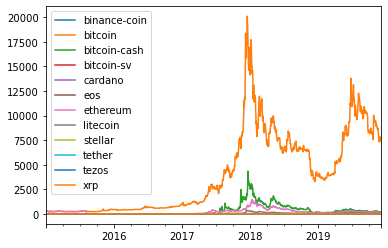

In [17]:
high.plot();

Fig. 1

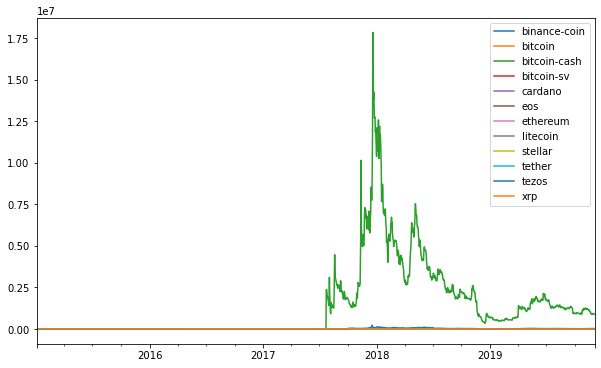

In [18]:
(high / high.iloc[0] * 100).plot(figsize=(10,6));

Fig. 2

## Get top 5 Crypto Currencies based on Highs

In [19]:
top5 = high.max().sort_values(ascending=False)
top5 = top5.head(5)
top5 = high[top5.index]
top5

bitcoin  bitcoin-cash  ethereum  litecoin  bitcoin-sv
2015-01-02   315.84      0.024423    315.84      2.70        2.70
2015-01-03   315.15      0.024317    315.15      2.67        2.67
2015-01-04   287.23      0.022142    287.23      2.15        2.15
2015-01-05   278.34      0.020316    278.34      2.16        2.16
2015-01-06   287.55      0.020745    287.55      2.12        2.12
...             ...           ...       ...       ...         ...
2019-11-30  7836.10    226.760000    156.69     49.28      110.60
2019-12-01  7571.62    219.260000    152.49     48.30      107.70
2019-12-02  7474.82    218.920000    152.12     47.81      104.89
2019-12-03  7418.86    217.160000    150.31     46.62      101.91
2019-12-04  7539.78    216.600000    150.68     46.54      100.91

[1798 rows x 5 columns]

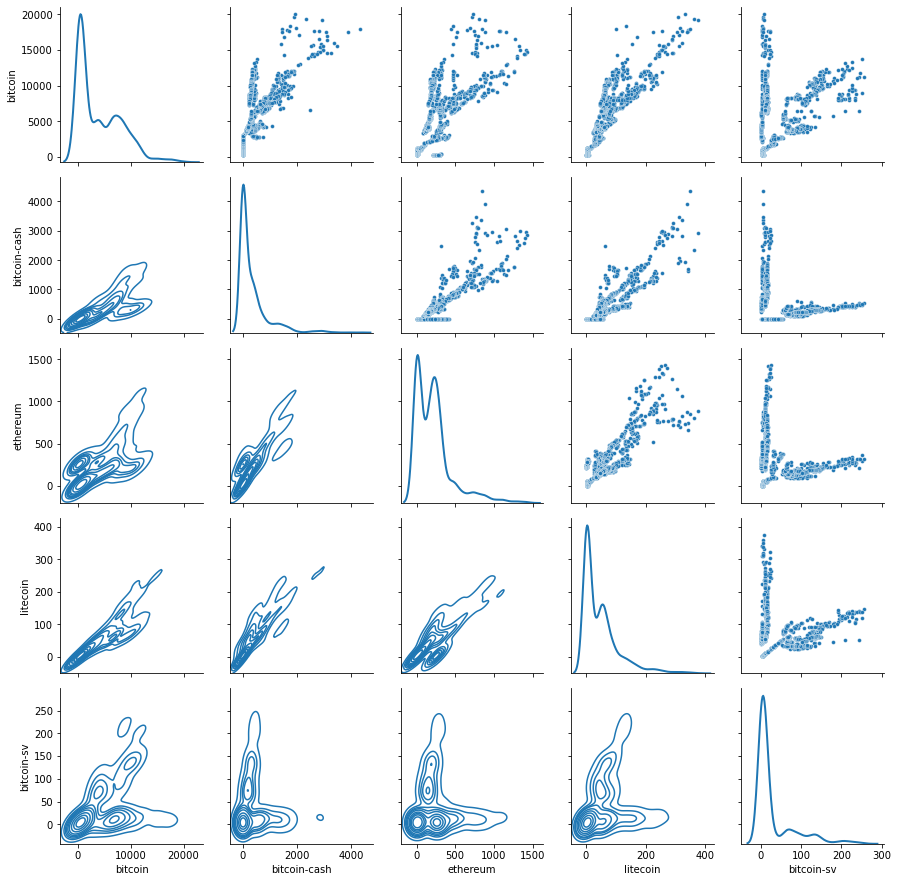

In [20]:
g = sns.PairGrid(top5, diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2);

Fig. 3

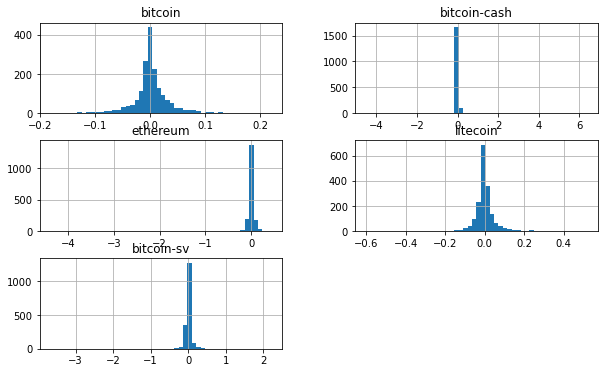

In [21]:
logReturns = np.log(top5 / top5.shift(1))
logReturns.hist(bins=50, figsize = (10,6));

Fig. 4

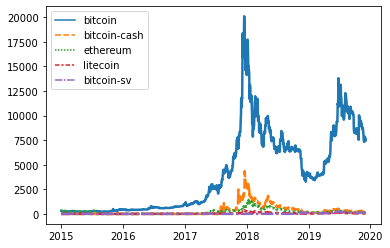

In [22]:
sns.lineplot(data=top5, palette="tab10", linewidth=2.5);

Fig. 5

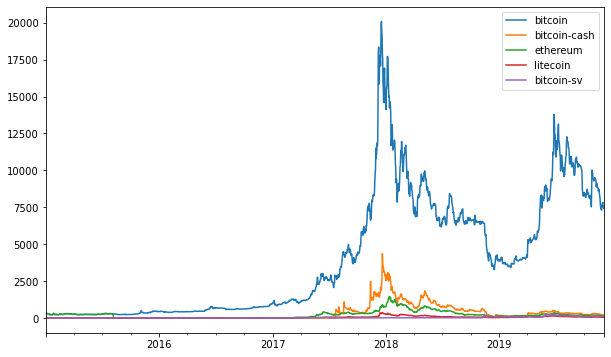

In [23]:
top5.plot(figsize=(10,6));

Fig. 6

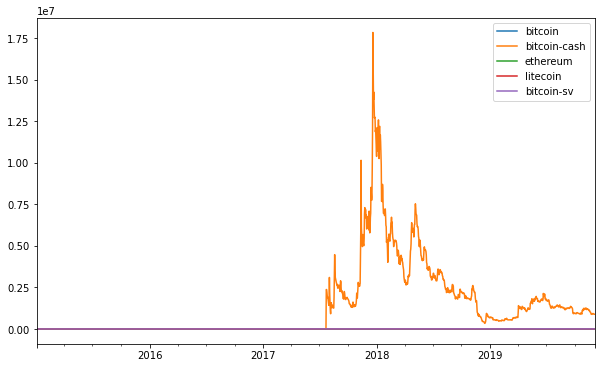

In [24]:
(top5 / top5.iloc[0] * 100).plot(figsize=(10,6));

Fig. 7

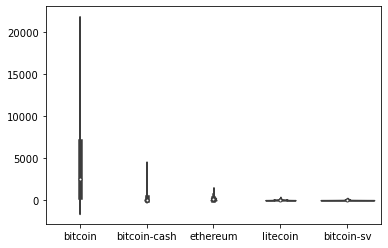

In [25]:
ax = sns.violinplot(data = top5);

Fig. 8

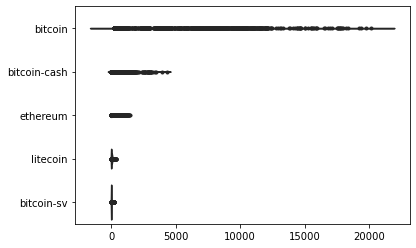

In [26]:
sns.violinplot(data=top5, palette="light:g", inner="points", orient="h");

Fig. 9

In [27]:
sns.set_theme(style="whitegrid", palette="muted")

#ax = sns.swarmplot(data=top5)
#ax.set(ylabel="")

Fig. 10

In [28]:
fig = px.area(top5, facet_col_wrap=2)
fig.show()

Fig. 11

In [29]:
crypto = top5.columns
dates = top5.index

fig = go.Figure(layout = go.Layout(
        updatemenus = [dict(type = "buttons", direction = "right", x = 0.9, y = 1.16)],
        xaxis = dict(title_text = "2015 to 2019"),
        yaxis = dict(title_text = "Price"),
        title = 'Top 5 Crypto Currencies Highs', title_x=0.5, title_y=0.95))

fig.add_trace(go.Line(x=dates, y = top5[crypto[0]].values, name = crypto[0], visible = True))
fig.add_trace(go.Line(x=dates, y = top5[crypto[1]].values, name = crypto[1], visible = True))
fig.add_trace(go.Line(x=dates, y = top5[crypto[2]].values, name = crypto[2], visible = True))
fig.add_trace(go.Line(x=dates, y = top5[crypto[3]].values, name = crypto[3], visible = True))
fig.add_trace(go.Line(x=dates, y = top5[crypto[4]].values, name = crypto[4], visible = True))

fig.update_layout(updatemenus=[dict(buttons=list([
                dict(label=crypto[0], method="update", args = [{"visible": [True, False, False, False, False]},
                          {"showlegend": True}]),
                dict(label=crypto[1], method="update", args=[{"visible": [False, True, False, False, False]},
                          {"showlegend": True}]),
                dict(label=crypto[2], method="update", args=[{"visible": [False, False, True, False, False]},
                          {"showlegend": True}]),
                dict(label=crypto[3], method="update", args=[{"visible": [False, False, False, True, False]},
                          {"showlegend": True}]),
                dict(label=crypto[4], method="update", args=[{"visible": [False, False, False, False, True]},
                          {"showlegend": True}]),
                dict(label="All", method="update", args=[{"visible": [True, True, True, True, True]}])]))])

fig.update_xaxes(rangeslider_visible=True, rangeselector=dict(buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")])))

fig.show()

C:\ProgramData\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




Fig. 12

In [30]:
crypto = top5.columns
dates = top5.index

fig = px.scatter(top5, x = top5.index, y = top5.columns, marginal_y = "violin")

fig.update_layout(title = {'text' : "Top 5 Crypto Currencies Highs",
                           'x':0.5,'xanchor':'center','y':0.97,'yanchor':'top',
                          'font':{'size':20}})

fig.update_layout(xaxis_title = "2015 to 2019",
    yaxis_title = "Highs",font = dict(size = 15))

fig.update_yaxes(matches = None, showticklabels = True)
fig.update_xaxes(matches = None, showticklabels = True)
fig.update_traces(marker = dict(opacity = 0.7, line = dict(width = 1,autocolorscale = True)),
                  selector = dict(mode = 'markers'))
fig.update_layout(height = 800, width = 1200)

fig.update_layout(updatemenus=[dict(buttons=list([
                dict(label="All", method="update", args=[{"visible": [True, True, True, True, True]}]),
                dict(label=crypto[2], method="update", args = [{"visible": [True, False, False,False,False]},
                          {"showlegend": True}]),
                dict(label=crypto[0], method="update", args=[{"visible": [False, True, False, False, False]},
                          {"showlegend": True}]),
                dict(label=crypto[3], method="update", args=[{"visible": [False, False, True, False, False]},
                          {"showlegend": True}]),
                dict(label=crypto[1], method="update", args=[{"visible": [False, False, False, True, False]},
                          {"showlegend": True}]),
                dict(label=crypto[4], method="update", args=[{"visible": [False, False, False, False, True]},
                          {"showlegend": True}])]))])

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.show()

Fig. 13

In [31]:
colors = bokeh.palettes.d3['Category10'][10]

def makePlot(data, title, xaxisLabel, yaxisLable, formatter, annotation):
    graph = figure(x_axis_type = "datetime", title = title)
    
    crypto = data.columns
    count = 0
    for cryp in crypto:
        graph.line(data.index.values, data[cryp], color = colors[count], legend_label = cryp,  line_width=1.5)
        
        count+=1
    graph.yaxis.formatter = NumeralTickFormatter(format = formatter)
    graph.legend.location = 'top_left'
    graph.title.align = 'center'
    graph.title.text_font_size = '16pt'
    graph.add_layout(Title(text=annotation, align="left"), "below")
    return graph

In [32]:
graph1 = makePlot(top5, '2015 to 2019 High Price of Top 5 Crypto Currencies', 'Date', 'Price','$0,0[.]00','Fig. 14')
graph2 = makePlot((np.log(top5 / top5.shift(1))/ 100), 
                  '2015 to 2019 Daily Returns of Price Highs on Top 5 Crypto Currencies', 
                  'Date', 'Daily Price Returns','(0.00%)','Fig. 15')

curdoc().theme = 'dark_minimal'
show(gridplot([[graph1,graph2]], plot_width=800, plot_height=800)) 

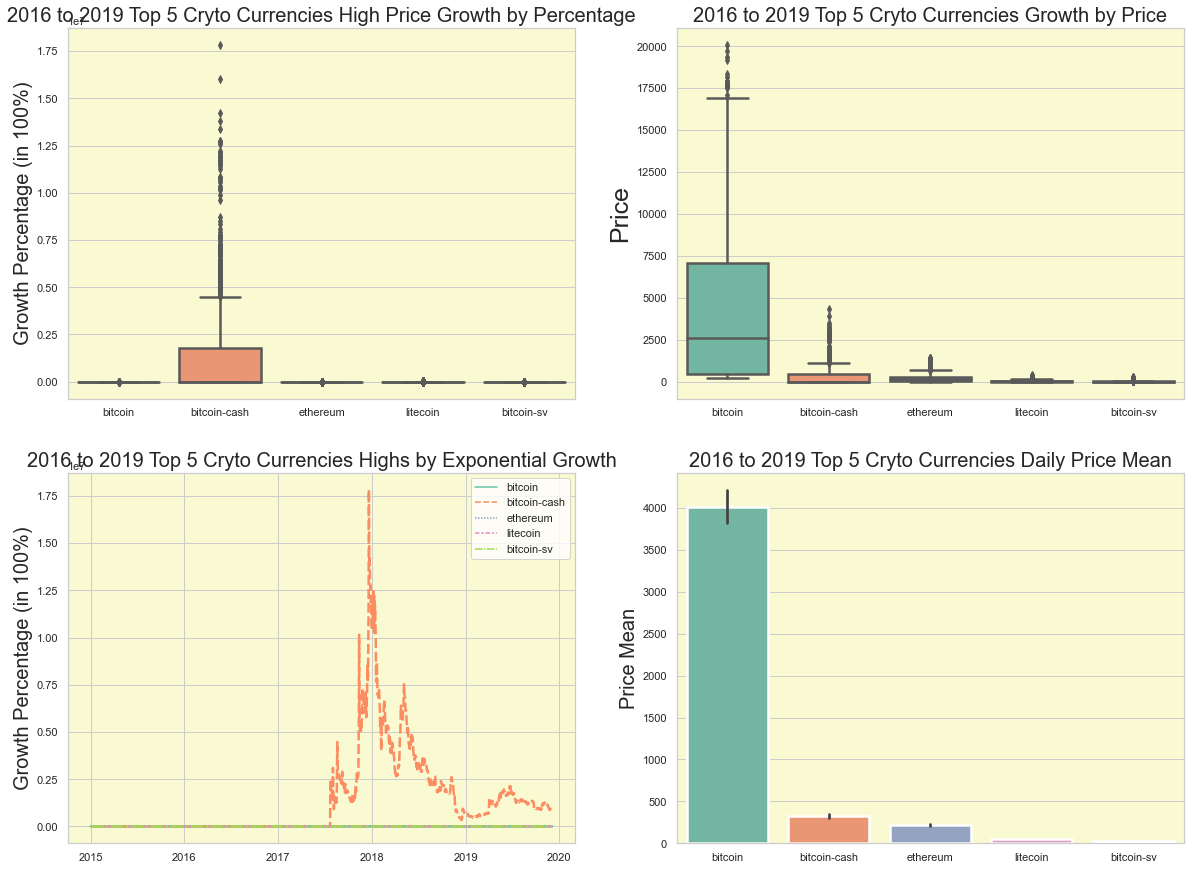

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

ax1 = sns.boxplot(ax=axes[0,0], data=(top5 / top5.iloc[0] * 100), palette="Set2", linewidth=2.5)
ax1.set_facecolor('lightgoldenrodyellow')
ax1.set_ylabel('Growth Percentage (in 100%)',fontsize=20)
ax1.set_title('2016 to 2019 Top 5 Cryto Currencies High Price Growth by Percentage',fontsize=20)

ax2 = sns.boxplot(ax=axes[0,1], data=top5, palette="Set2", linewidth=2.5)
ax2.set_facecolor('lightgoldenrodyellow')
ax2.set_ylabel('Price',fontsize=25)
ax2.set_title('2016 to 2019 Top 5 Cryto Currencies Growth by Price',fontsize=20)

ax3 = sns.lineplot(ax=axes[1,0], data=(top5 / top5.iloc[0] * 100), palette="Set2", linewidth=2.5)
ax3.set_facecolor('lightgoldenrodyellow')
ax3.set_ylabel('Growth Percentage (in 100%)',fontsize=20)
ax3.set_title('2016 to 2019 Top 5 Cryto Currencies Highs by Exponential Growth',fontsize=20)

ax4 = sns.barplot(ax=axes[1,1], data=top5, palette="Set2", linewidth=2.5)
ax4.set_facecolor('lightgoldenrodyellow')
ax4.set_ylabel('Price Mean',fontsize=20)
ax4.set_title('2016 to 2019 Top 5 Cryto Currencies Daily Price Mean',fontsize=20)

plt.show();

Fig. 16

# Question 3

## Top 3 Crypto Currencies by Volume

Now I am going to explore and visualize the Top 3 Crypto Currencies based on volume between 2016 to 2019.  First, I will need to filter the data frame of volume by the dates required and verify that the dataset has the correct dates.  In the first line chart I can see that there is a lot of volume in the Crypto Currency space but there seem to be clear winners, but I cannot see this on this little line chart.  See fig. 17.  As before I will normalize the volumes based on returns and one clear high growth is Tether.  You can view this on a simple line graph.  See fig. 18 (Hilpisch, 2019, pg. 410).  Now onto the task at hand which is getting the top 3 Crypto Currencies based on Volume.  The way I got this was using the max function and sorting them descending.  Then assigning the head to a variable with the top 3 names.  Finally selecting the columns, I needed with the top 3 names and viewing the data frame for verification.  Now to explore this data a bit more.  I did this by looking first at correlations of the dataset and then the distributions of the returns.  See Fig. 19 and 20 (Hilpisch, 2019, pg. 224).    Next is viewing the top 5 in a simple line chart and see how they compare. See Fig. 21.   Then see how the dataset looks on a return basis.  See Fig. 22 (Hilpisch, 2019, pg. 410).  Tether is again the clear winner there and easier to see.  Now off to look at other plots to see the dataset.  See Fig. 23, 24, and 25.  On Fig. 25 the swarmplot took a not as long as the top 5 but again no real insight.  The plot for the 17-to-35-year old’s was going to be Fig. 26 and as Fig. 13 but decided I did not like the look of it.  The final plot for the 17-to-30-year old’s is Fig. 27 and 28 which is two charts in one plot.  I used the plot same as above but showing volume of course.  I used the same chart for Volume as I did for High and did not really change much.  In Fig. 27 you can see the volumes are high for both Bitcoin and Tether but in Fig. 28 Tether has the largest daily moves followed by Ethereum.  I am quite happy how this chart turned out in the end.  The 60+ age group plot again I am very pleased with Fig. 25.  Lots of trial and error but in the end got the charts I wanted in the plot.  Using Seaborn examples and incorporating the charts I wanted. I was able to use this with plt.subplots command and putting in 2 by 2 charts.  In chart number one I used the seaborn box plot using the sns.boxpot command.  Placing the chart in number one spot using the axes[0,1], the coloring I messed about a good bit using Set2 in the end and linewidth 2.5.  I changed the background color using the set_facecolor command because the color is soft and looks like a writing notepad with the lines.   The Set2 color is softer and does not have the color blue as you mentioned once that not to use blue with the older crowd.  The first chart shows a violin chart and shows the tether growth by percentage but again the outliers are quite high and many.  Bitcoin and Ethereum are not as high growth but wide on the distribution.  The second chart I chose a line chart to show the exponential growth of the currencies using the percent change and cumulative sum commands.  You can see how Tether growth exploded whereas Bitcoin and Ethereum are quite level in comparison.  It was easy to show this with the above commands.  Chart number 3 I chose a box chart and went with the median daily returns, I did this by using the numpy median command in the akwgs of estimator.  Here you can see that the ranking of the median daily volume percentage moves.  Bitcoin is quite large in its daily return mean.  The 4th and final chart I chose the box plot to show the distribution of the daily volumes and even though Tether is less than Bitcoin in mean and distribution the outliers are quite high.  The volume shows how investors are buying into Crypto Currencies, but it is not for the faint of heart as there is such large daily movements and an average investor could find this difficult to stomach. The plots clearly show this. 

## Add dates as index in data frames and Filter Dates Needed
Here I will filter the dates needed using the dates and greater than less than.  These are the dates required in the CA to show from 1 January 2016 to 31 December 2019 for top volume.

In [34]:
vol = vol[(vol.index > "2016-01-01") & (vol.index <= '2019-12-31')]

## Verify Data Frame Dates
Now I want to see that my data frame has the correct dates and I do this by typing and running the data frame name in a cell.

In [35]:
vol

binance-coin       bitcoin  bitcoin-cash   bitcoin-sv  \
2016-01-02     3020260.0  3.009660e+07  4.701210e+03    3020260.0   
2016-01-03     2406150.0  3.963380e+07  1.388860e+03    2406150.0   
2016-01-04     3309740.0  3.847750e+07  8.118170e+04    3309740.0   
2016-01-05     2104650.0  3.452260e+07  1.350460e+03    2104650.0   
2016-01-06     2208860.0  3.404250e+07  5.410190e+05    2208860.0   
...                  ...           ...           ...          ...   
2019-11-30   213428131.0  1.715819e+10  1.309093e+09  392006505.0   
2019-12-01   203268417.0  1.872071e+10  1.260405e+09  377438739.0   
2019-12-02   200809249.0  1.708204e+10  1.164377e+09  393387957.0   
2019-12-03   219927266.0  1.479749e+10  1.072207e+09  408257124.0   
2019-12-04   237605471.0  2.166424e+10  1.441055e+09  492295285.0   

                cardano           eos      ethereum      litecoin  \
2016-01-02     45950.10  3.020260e+06  2.555040e+05  3.020260e+06   
2016-01-03     43530.60  2.406150e+06  4.076320e+05  2.406150e+06   
2016-01-04      4634.31  3.309740e+06  3.462450e+05  3.309740e+06   
2016-01-05     18238.60  2.104650e+06  2.198330e+05  2.104650e+06   
2016-01-06     27863.20  2.208860e+06  3.087910e+05  2.208860e+06   
...                 ...           ...           ...           ...   
2019-11-30  64184926.00  1.537951e+09  6.565951e+09  2.678481e+09   
2019-12-01  59641355.00  1.792147e+09  7.102780e+09  2.781414e+09   
2019-12-02  43069274.00  1.641895e+09  6.670561e+09  2.680452e+09   
2019-12-03  34356883.00  1.391934e+09  6.204380e+09  2.557212e+09   
2019-12-04  51692274.00  1.991657e+09  7.865937e+09  2.951880e+09   

                 stellar        tether        tezos           xrp  
2016-01-02  4.595010e+04  4.701210e+03     45950.10  2.785390e+05  
2016-01-03  4.353060e+04  1.388860e+03     43530.60  2.917230e+05  
2016-01-04  4.634310e+03  8.118170e+04      4634.31  3.108200e+05  
2016-01-05  1.823860e+04  1.350460e+03     18238.60  3.815540e+05  
2016-01-06  2.786320e+04  5.410190e+05     27863.20  3.162350e+05  
...                  ...           ...          ...           ...  
2019-11-30  2.282599e+08  1.914520e+10  28706667.00  1.160033e+09  
2019-12-01  2.149994e+08  2.102785e+10  24127567.00  1.176237e+09  
2019-12-02  2.040957e+08  1.909339e+10  27574097.00  1.187514e+09  
2019-12-03  1.508355e+08  1.669109e+10  41462224.00  1.017648e+09  
2019-12-04  2.077892e+08  2.476190e+10  46048752.00  1.427313e+09  

[1433 rows x 12 columns]

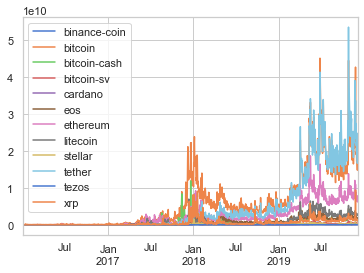

In [36]:
vol.plot();

Fig. 17

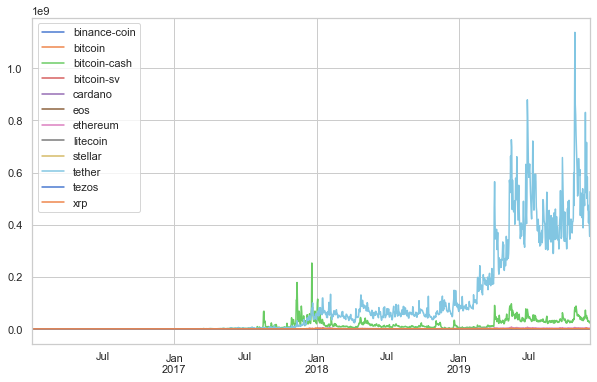

In [37]:
(vol / vol.iloc[0] * 100).plot(figsize=(10,6));

Fig. 18

In [38]:
top3 = vol.sum().sort_values(ascending=False)
top3 = top3.head(3)
top3.index
top3 = vol[top3.index]
top3

bitcoin        tether      ethereum
2016-01-02  3.009660e+07  4.701210e+03  2.555040e+05
2016-01-03  3.963380e+07  1.388860e+03  4.076320e+05
2016-01-04  3.847750e+07  8.118170e+04  3.462450e+05
2016-01-05  3.452260e+07  1.350460e+03  2.198330e+05
2016-01-06  3.404250e+07  5.410190e+05  3.087910e+05
...                  ...           ...           ...
2019-11-30  1.715819e+10  1.914520e+10  6.565951e+09
2019-12-01  1.872071e+10  2.102785e+10  7.102780e+09
2019-12-02  1.708204e+10  1.909339e+10  6.670561e+09
2019-12-03  1.479749e+10  1.669109e+10  6.204380e+09
2019-12-04  2.166424e+10  2.476190e+10  7.865937e+09

[1433 rows x 3 columns]

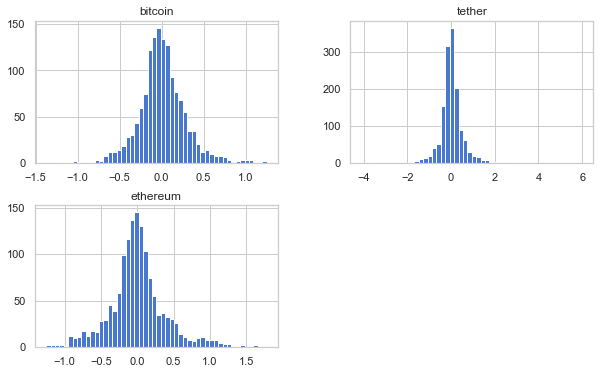

In [39]:
logReturns = np.log(top3 / top3.shift(1))
logReturns.hist(bins=50, figsize = (10,6));

Fig. 19

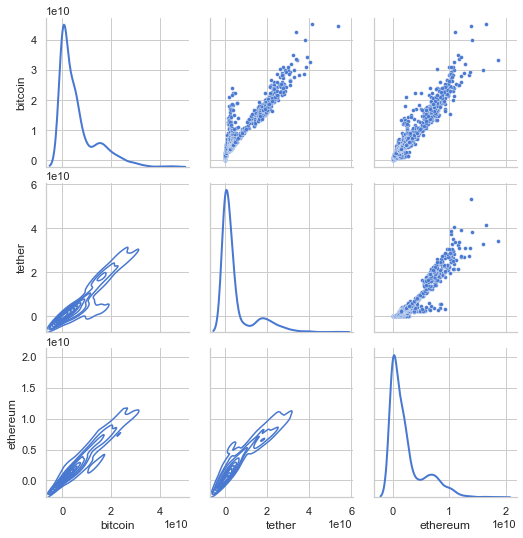

In [40]:
g = sns.PairGrid(top3, diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2);

Fig. 20

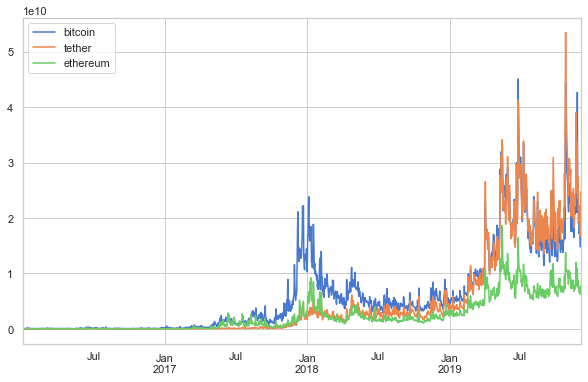

In [41]:
top3.plot(figsize=(10,6));

Fig. 21

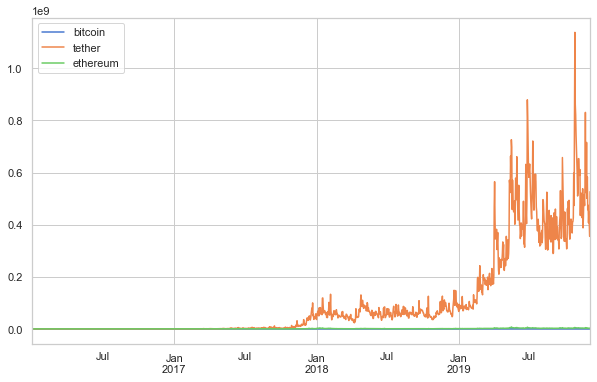

In [42]:
(top3 / top3.iloc[0] * 100).plot(figsize=(10,6));

Fig. 22

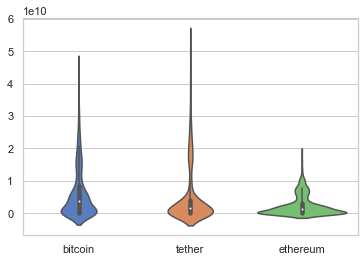

In [43]:
ax = sns.violinplot(data = top3);

Fig. 23

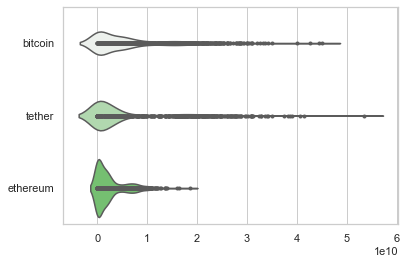

In [44]:
sns.violinplot(data=top3, palette="light:g", inner="points", orient="h");

Fig. 24

In [45]:
sns.set_theme(style="whitegrid", palette="muted")

#ax = sns.swarmplot(data=top3)
#ax.set(ylabel="")

Fig. 25

In [46]:
crypto = top3.columns
dates = top3.index

fig = px.scatter(top3, x = top3.index, y = top3.columns, marginal_y = "violin")

fig.update_layout(title = {'text' : "Top 3 Crypto Currencies by Volume",
                           'x':0.5,'xanchor':'center','y':0.97,'yanchor':'top',
                          'font':{'size':20}})

fig.update_layout(xaxis_title = "2016 to 2019", yaxis_title = "Volume",font = dict(size = 15))

fig.update_yaxes(matches = None, showticklabels = True)
fig.update_xaxes(matches = None, showticklabels = True)
fig.update_traces(marker = dict(opacity = 0.7, line = dict(width = 1, color = 'DarkSlateGrey')),
                  selector = dict(mode = 'markers'))
fig.update_layout(height = 800, width = 1200)

fig.update_layout(updatemenus=[dict(buttons=list([
                dict(label="All", method="update", args=[{"visible": [True, True, True, True, True]}]),
                dict(label=crypto[1], method="update", args = [{"visible": [True, False, False]},
                          {"showlegend": True}]),
                dict(label=crypto[0], method="update", args=[{"visible": [False, True, False]},
                          {"showlegend": True}]),
                dict(label=crypto[2], method="update", args=[{"visible": [False, False, True]},
                          {"showlegend": True}])]))])

fig.update_xaxes(rangeslider_visible=True,rangeselector=dict(buttons=list([
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")])))

fig.show()

Fig. 26

In [47]:
graph1 = makePlot(top3, '2016 to 2019 Volume of Top 3 Crypto Currencies', 'Date', 'Volume',"0,0",'Fig. 27')
graph2 = makePlot((np.log(top3 / top3.shift(1))/ 100), 
                  '2016 to 2019 Daily Returns of Volume on Top 3 Crypto Currencies', 
                  'Date', 'Volume Returns','(0.000%)','Fig. 28')

curdoc().theme = 'dark_minimal'
show(gridplot([[graph1,graph2]], plot_width=800, plot_height=800))  

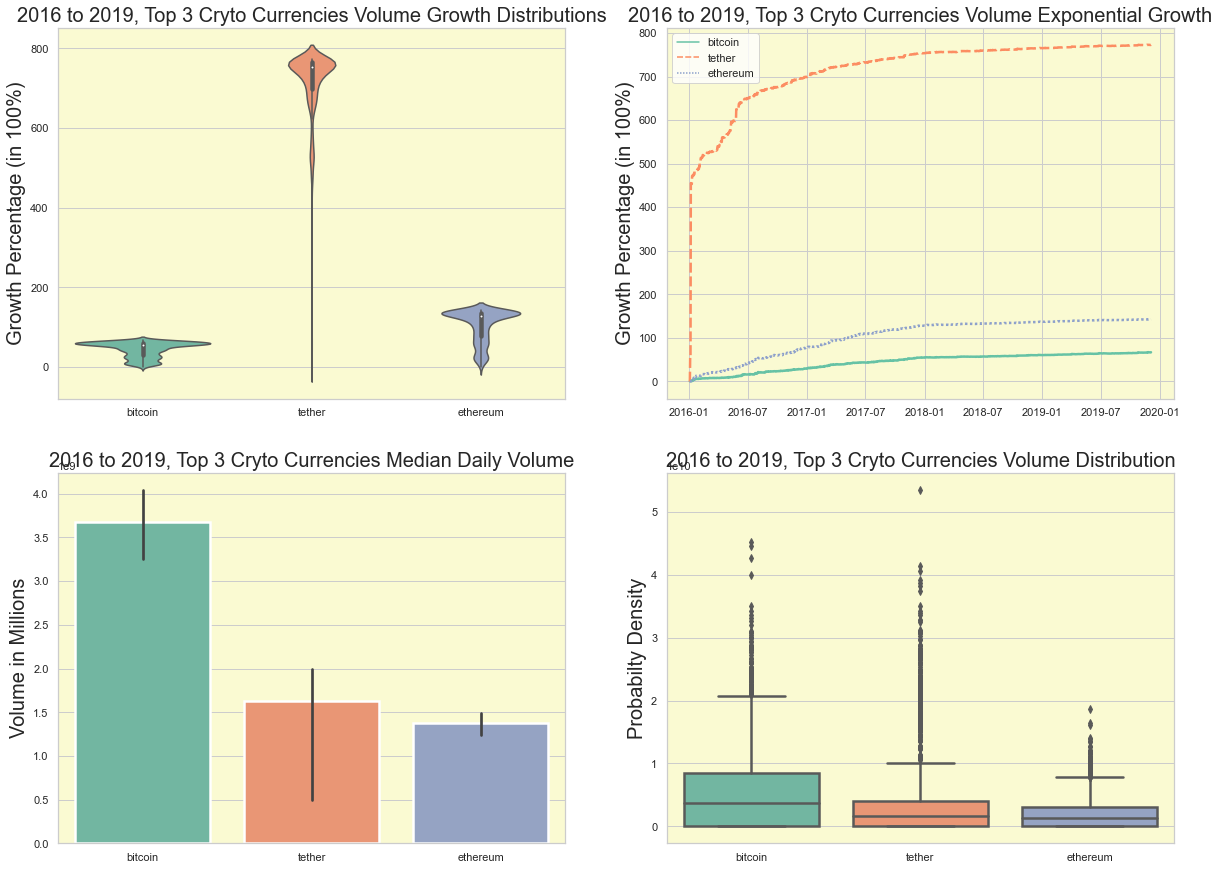

In [48]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

ax1 = sns.violinplot(ax=axes[0,0], data = top3.pct_change().cumsum(), palette="Set2")
ax1.set_facecolor('lightgoldenrodyellow')
ax1.set_ylabel('Growth Percentage (in 100%)',fontsize=20)
ax1.set_title('2016 to 2019, Top 3 Cryto Currencies Volume Growth Distributions',fontsize=20)

ax2 = sns.lineplot(ax=axes[0,1], data=top3.pct_change().cumsum(), palette="Set2", linewidth=2.5)
ax2.set_facecolor('lightgoldenrodyellow')
ax2.set_ylabel('Growth Percentage (in 100%)',fontsize=20)
ax2.set_title('2016 to 2019, Top 3 Cryto Currencies Volume Exponential Growth',fontsize=20)

ax3 = sns.barplot(ax=axes[1,0], data=top3, palette="Set2", linewidth=2.5, estimator=median)
ax3.set_facecolor('lightgoldenrodyellow')
ax3.set_ylabel('Volume in Millions',fontsize=20)
ax3.set_title('2016 to 2019, Top 3 Cryto Currencies Median Daily Volume',fontsize=20)

ax4 = sns.boxplot(ax=axes[1,1], data=top3, palette="Set2", linewidth=2.5)
ax4.set_facecolor('lightgoldenrodyellow')
ax4.set_ylabel('Probabilty Density',fontsize=20)
ax4.set_title('2016 to 2019, Top 3 Cryto Currencies Volume Distribution',fontsize=20)

plt.show();

Fig. 29

## Final Thoughts
This was a tougher project than I thought initially as I had to do a lot of thinking of how to best tell the story using plots.  It was not easy, but I think the bigger struggle was to get the charts that I wanted and sorting out the colors and the settings.  I love the analysis of the data but do struggle with the best way to plot it and using colors and best charts or plots.  I did enjoy analyzing the data.  The result of the last CA helped me go through this CA and to document more not only the graphs and colors but the code itself.  The documentation of the code itself helped me understand plotly and bokeh charts better.  Explaining it in detail made me go through it a bit more.  Look forward to next semester after some time off and please God some sun.  Have a brilliant summer.  

## Reference list

Anon, (n.d.).

Anon, (n.d.).

Contributors, B. (n.d.). bokeh.models.formatters. [online] docs.bokeh.org. Available at: https://docs.bokeh.org/en/latest/docs/reference/models/formatters.html [Accessed 29 May 2021].

Contributors, B. (n.d.). bokeh.themes. [online] docs.bokeh.org. Available at: https://docs.bokeh.org/en/latest/docs/reference/themes.html [Accessed 29 May 2021].

Contributors, B. (n.d.). Gallery. [online] docs.bokeh.org. Available at: https://docs.bokeh.org/en/latest/docs/gallery.html [Accessed 29 May 2021].

Contributors, B. (n.d.). Styling visual attributes. [online] docs.bokeh.org. Available at: https://docs.bokeh.org/en/latest/docs/user_guide/styling.html [Accessed 29 May 2021].

DEV Community. (n.d.). Subplotting with matplotlib and seaborn. [online] Available at: https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8.

Galarnyk, M. (2018). Understanding Boxplots. [online] Medium. Available at: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51.

GeeksforGeeks. (2018). Python | Pandas.to_datetime(). [online] Available at: https://www.geeksforgeeks.org/python-pandas-to_datetime/ [Accessed 28 May 2021].

GeeksforGeeks. (2020). Python Bokeh – Visualizing Stock Data. [online] Available at: https://www.geeksforgeeks.org/python-bokeh-visualizing-stock-data/ [Accessed 29 May 2021].

Hilpisch, Y.J. (2019). Python for finance : mastering data-driven finance. Sebastopol, Ca: O’reilly Media.

Lewinson, E. (2020). Violin plots explained. [online] Medium. Available at: https://towardsdatascience.com/violin-plots-explained-fb1d115e023d.

numpy.org. (n.d.). numpy.median — NumPy v1.20 Manual. [online] Available at: https://numpy.org/doc/stable/reference/generated/numpy.median.html [Accessed 28 May 2021].

plotly.com. (n.d.). Intro to Animations. [online] Available at: https://plotly.com/python/animations [Accessed 28 May 2021].

plotly.com. (n.d.). Time Series and Date Axes. [online] Available at: https://plotly.com/python/time-series/.

Seaborn Examples. (n.d.).

Seaborn. (n.d.).

seaborn.pydata.org. (n.d.). seaborn.barplot — seaborn 0.11.1 documentation. [online] Available at: https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot [Accessed 28 May 2021].

Stack Overflow. (n.d.). Animated lineplot with python plotly. [online] Available at: https://stackoverflow.com/questions/62231223/animated-lineplot-with-python-plotly [Accessed 28 May 2021].

Stack Overflow. (n.d.). python - Adjust title font size for a Bokeh figure. [online] Available at: https://stackoverflow.com/questions/27405964/adjust-title-font-size-for-a-bokeh-figure [Accessed 29 May 2021].

Stack Overflow. (n.d.). python - Convert number strings with commas in pandas DataFrame to float. [online] Available at: https://stackoverflow.com/questions/22137723/convert-number-strings-with-commas-in-pandas-dataframe-to-float [Accessed 28 May 2021].
‌
